In [1]:
pip install pandas matplotlib seaborn


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_csv("/Unemployment in India.csv")


In [12]:
df.head()
df.info()
df.describe()
df['Region'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


,count
Region,
Andhra Pradesh,28
Bihar,28
Chhattisgarh,28
Delhi,28
Karnataka,28
Gujarat,28
Haryana,28
Himachal Pradesh,28
Jharkhand,28


In [14]:
df.rename(columns={'Frequency ': 'Frequency'}, inplace=True)


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [19]:
# Load your uploaded CSV
df = pd.read_csv("/Unemployment in India.csv")


In [20]:
print(df.head())
print(df.info())
print(df.columns)


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data colu

In [21]:
# Clean column names
df.columns = df.columns.str.strip()


In [22]:
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Region': 'Region',
    'Date': 'Date'
}, inplace=True)


In [23]:
df['Date'] = pd.to_datetime(df['Date'])


<ipython-input-23-b9c6864122be>:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


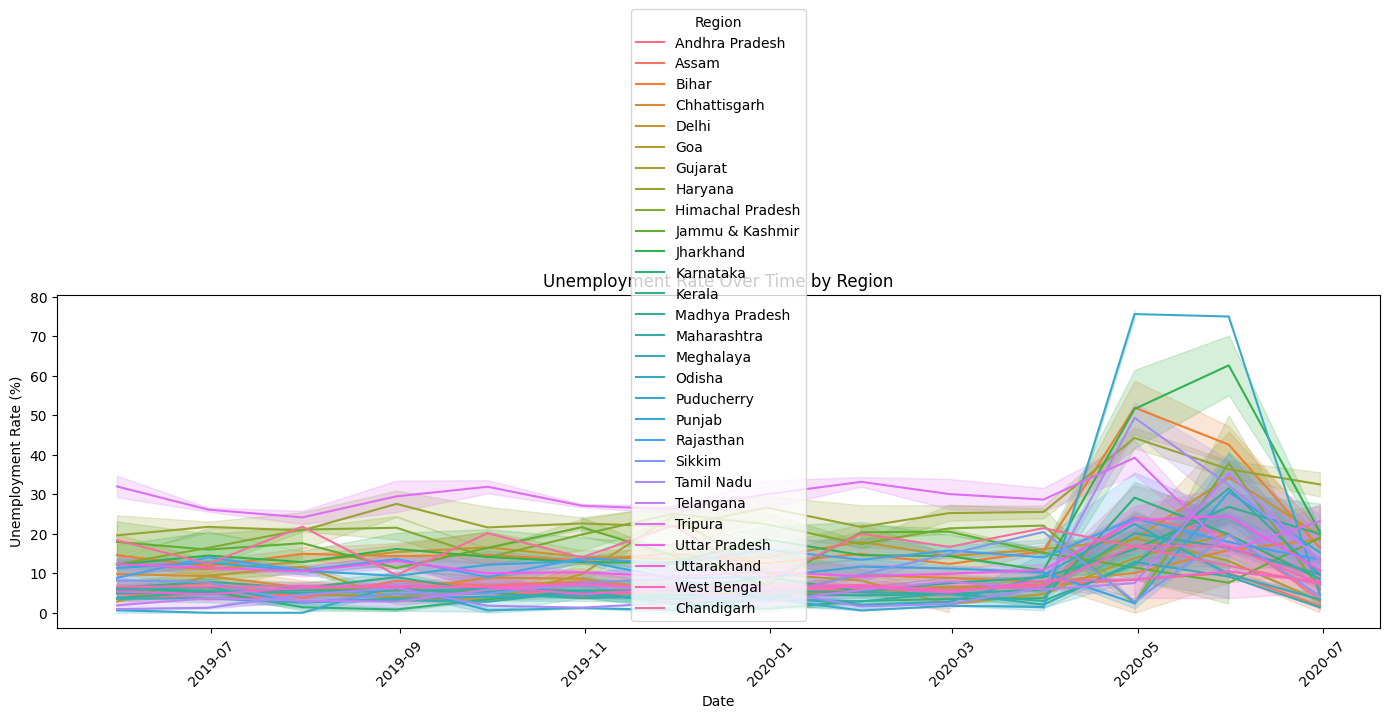

In [24]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='Date', y='Unemployment_Rate', hue='Region')
plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-25-cc27539113e2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_unemp.values, y=avg_unemp.index, palette='coolwarm')


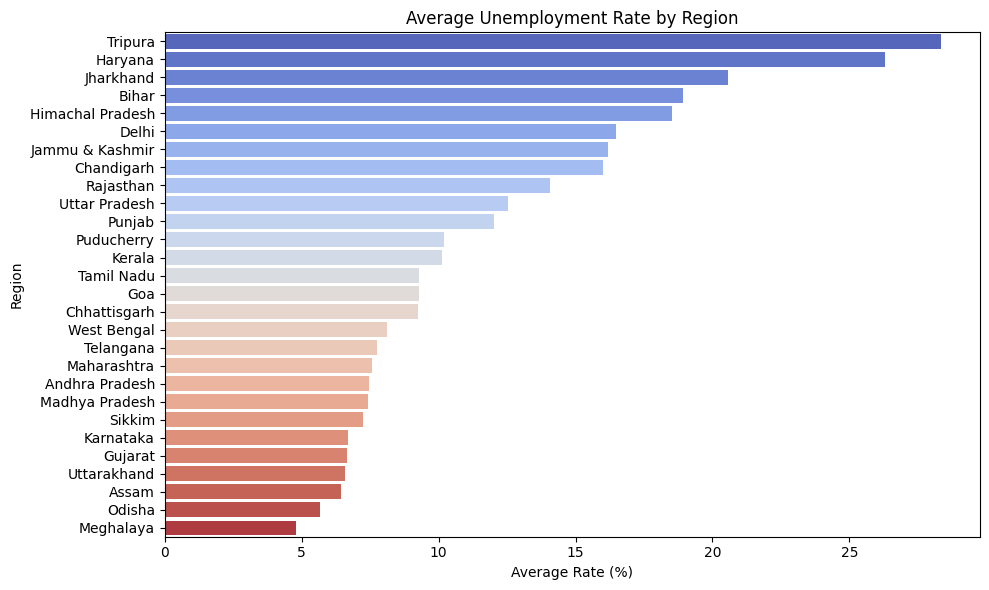

In [25]:
avg_unemp = df.groupby('Region')['Unemployment_Rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_unemp.values, y=avg_unemp.index, palette='coolwarm')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Average Rate (%)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


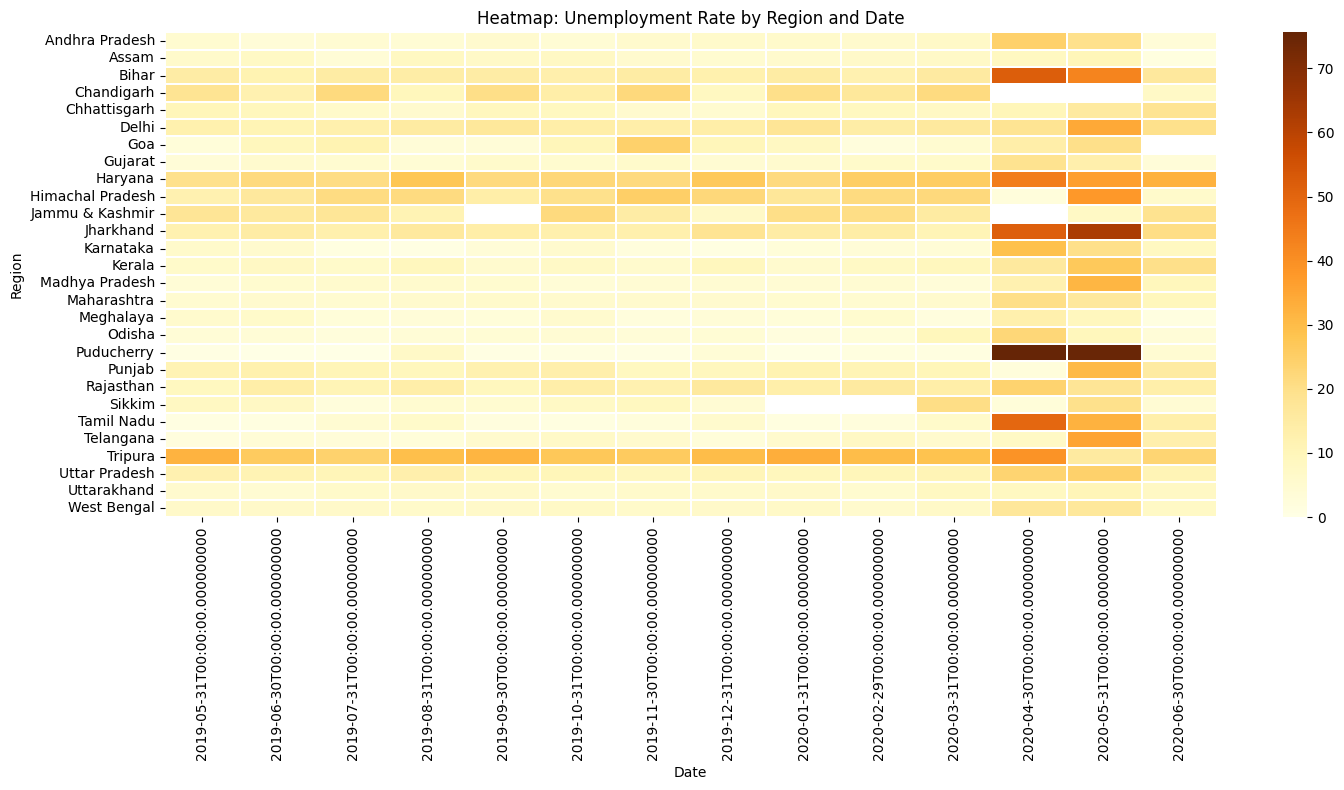

In [26]:
pivot_df = df.pivot_table(values='Unemployment_Rate', index='Region', columns='Date')

plt.figure(figsize=(15, 8))
sns.heatmap(pivot_df, cmap='YlOrBr', linewidths=0.3, linecolor='white')
plt.title('Heatmap: Unemployment Rate by Region and Date')
plt.tight_layout()
plt.show()
